# Bubble Sort

<IPython.core.display.Javascript object>


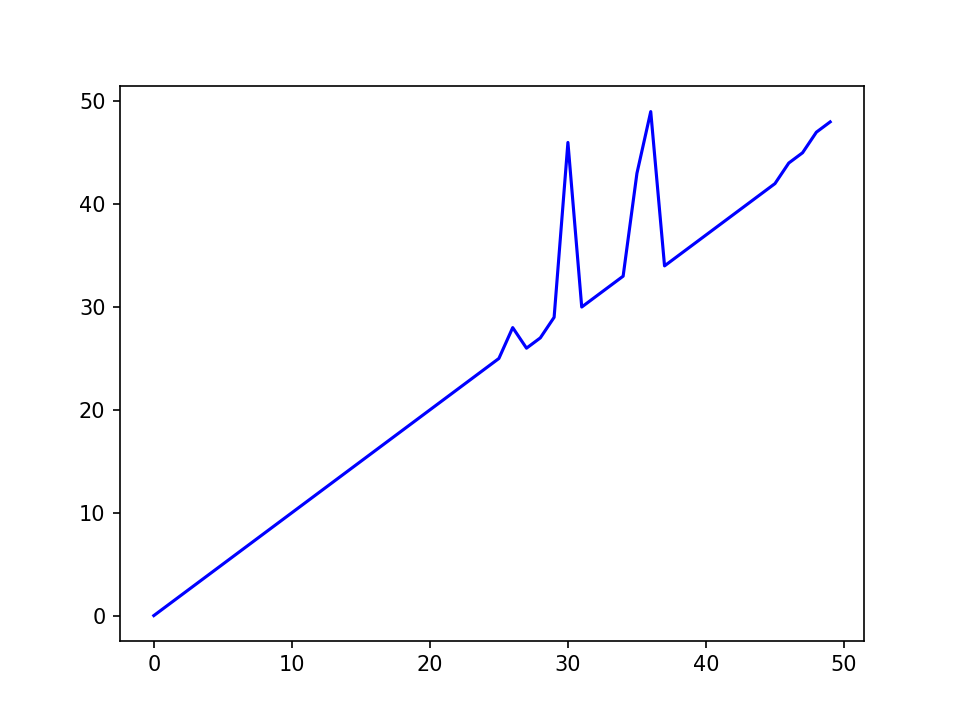

<IPython.core.display.Javascript object>


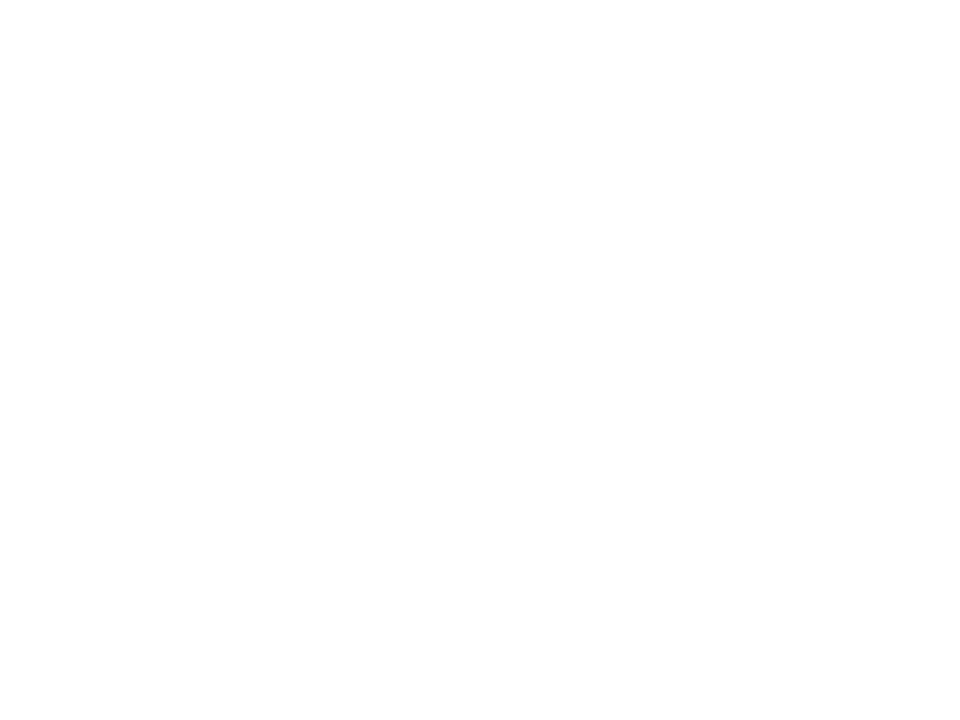

In [1]:

%matplotlib notebook
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
x = np.array([i for i in range(50)])
y = [i for i in range(50)]
ry = random.sample(y, len(y))
#plt.bar(x, ry)
ims = []  
def visualize(y):
    im = plt.plot(x,y,'b')
    ims.append(im)
    
def bubble_sort(a):
    n = len(a)
    for i in range(n -1):
        for j in range(n-1, i, -1):
            if a[j-1] > a[j]:
                a[j -1], a[j] = a[j], a[j-1]
                visualize(a)

bubble_sort(ry)

fig = plt.figure()
ani = animation.ArtistAnimation(fig,ims,interval=1)
plt.show()




# Selection Sort

<IPython.core.display.Javascript object>


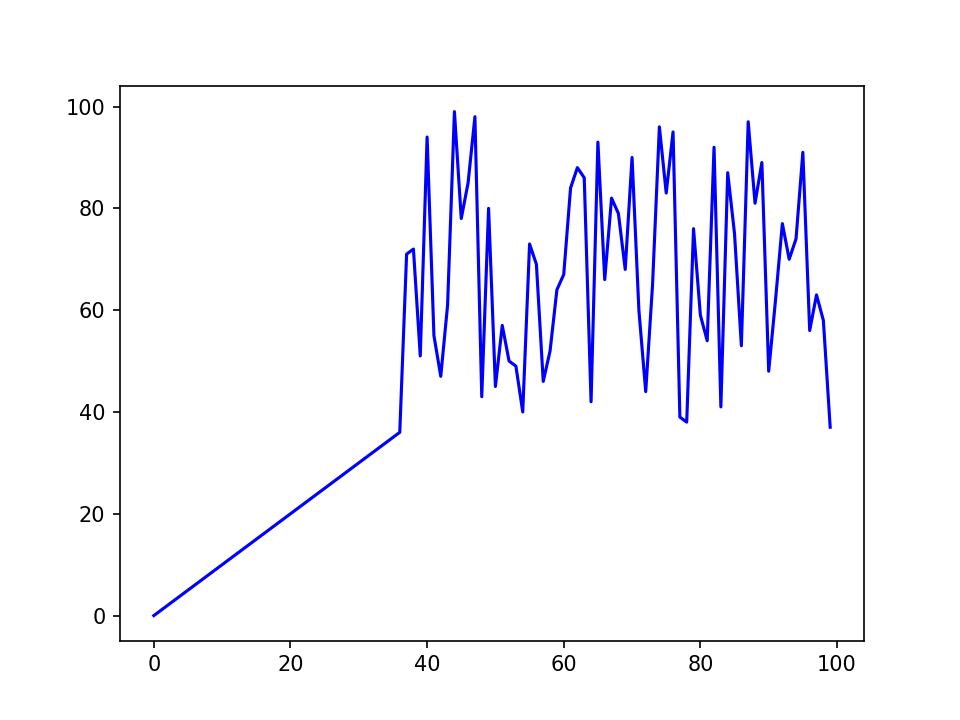

<IPython.core.display.Javascript object>


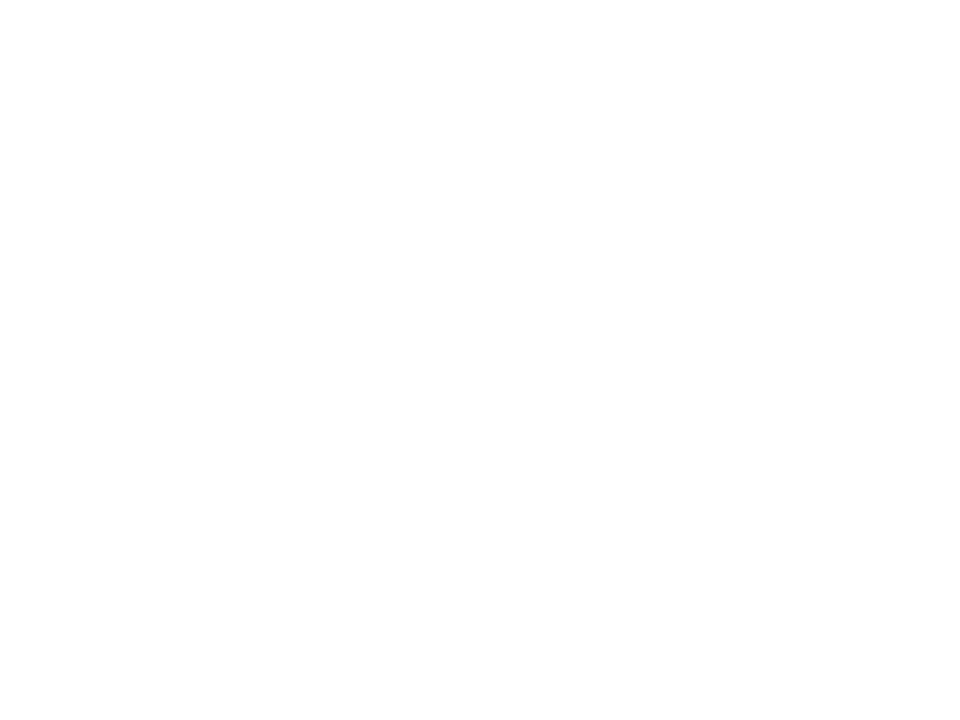

In [1]:
%matplotlib notebook
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
x = np.array([i for i in range(100)])
y = [i for i in range(100)]
ry = random.sample(y, len(y))
ims =[]
def visualize(y):
    im = plt.plot(x,y,'b')
    ims.append(im)

def selection_sort(a):
    n = len(a)
    for i in range(n-1):
        min = i
        for j in range(i + 1, n):
            if a[j] < a[min]:
                min = j #未ソート済の配列の中から最小値を求める
        a[i],a[min] = a[min], a[i]
        visualize(a)

selection_sort(ry)
fig = plt.figure()
ani = animation.ArtistAnimation(fig,ims, interval= 100)
plt.show()


# Heap Sort (min)

<IPython.core.display.Javascript object>


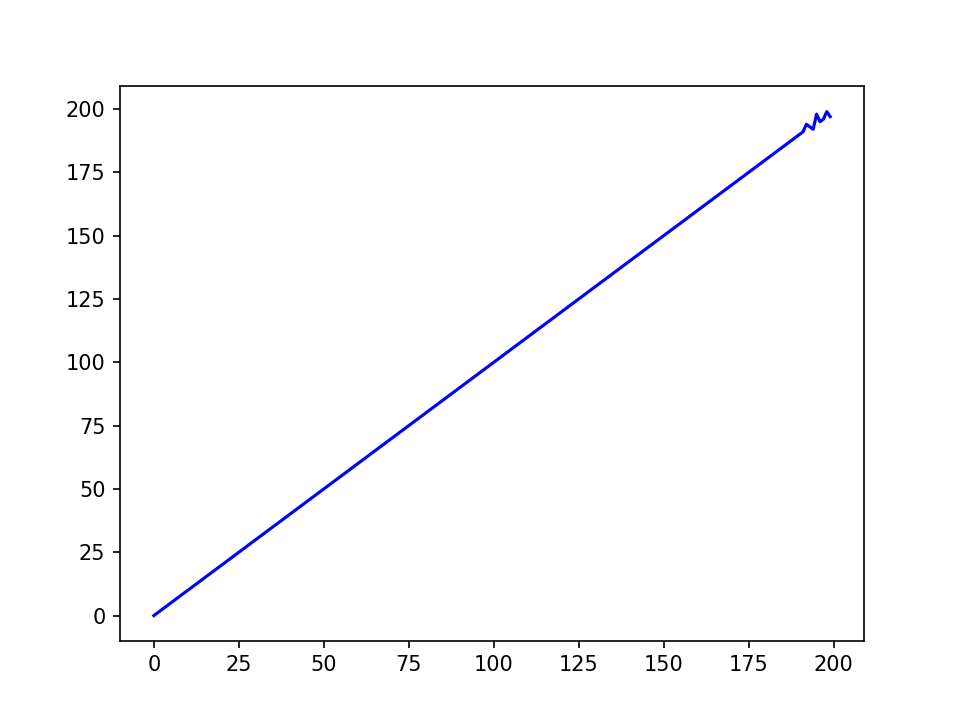

<IPython.core.display.Javascript object>


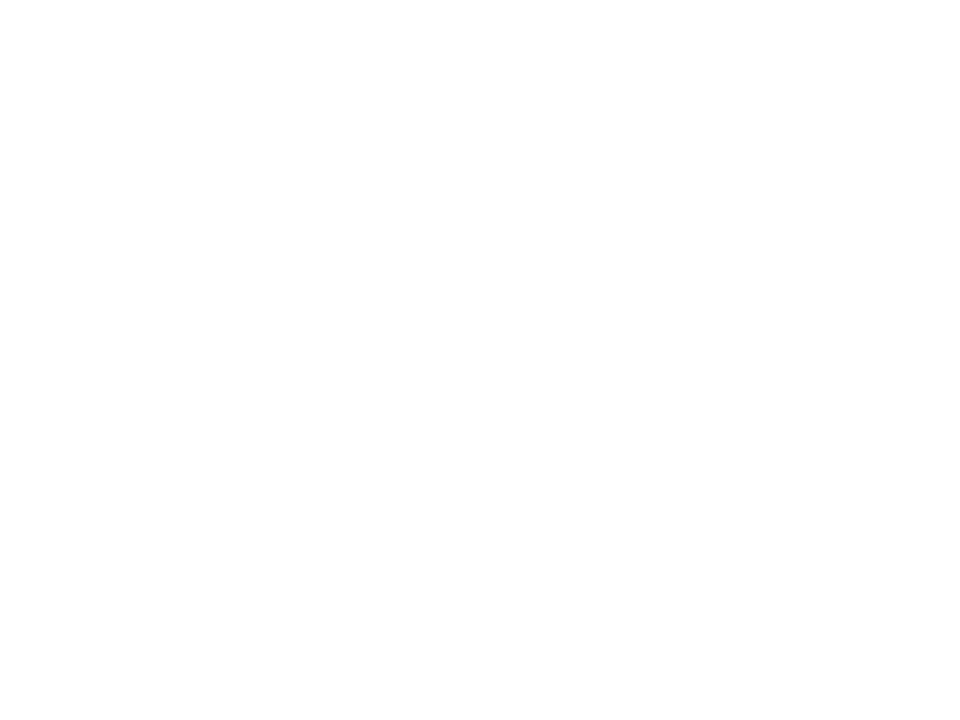

In [7]:
%matplotlib notebook
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
x = np.array([i for i in range(200)])
y = [i for i in range(200)]
ry = random.sample(y, len(y))
ims =[]
def visualize(y):
    im = plt.plot(x,y,'b')
    ims.append(im)

#minヒープ
def build_min_heap(arr):
    for i in reversed(range(len(arr)//2)):
        min_heapify(arr,i)

def min_heapify(arr,i):
    left = i * 2 +1
    right = i *2 +2
    length = len(arr) -1 
    smallest = i
    if left <= length and arr[i] > arr[left]:
        smallest = left
    if right <= length and arr[smallest] > arr[right]:
        smallest = right
    if smallest != i:
        arr[i] , arr[smallest] = arr[smallest], arr[i]
        visualize(sorted_arr + arr)
        min_heapify(arr, smallest)
sorted_arr = []
#ヒープソート
def heap_sort(arr):
    build_min_heap(arr)
    for _ in range(len(arr)):
        arr[0], arr[-1] = arr[-1],arr[0]
        sorted_arr.append(arr.pop())
        min_heapify(arr,0)
        
heap_sort(ry)
fig = plt.figure()
ani = animation.ArtistAnimation(fig,ims, interval= 1)
plt.show()

